In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
parameters = {'axes.titlesize': 15, 'font.family' : ['AppleGothic'],
             'axes.unicode_minus' : False}
plt.rcParams.update(parameters)
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

## 후보지 

In [ ]:
#데이터 불러오기 
#facilities_df = pd.read_csv('/Users/eunyoungshin/Desktop/csv/후보지통합.shp.csv', encoding='cp949')

facilities_df = pd.read_csv('/Users/eunyoungshin/Desktop/csv/(은영)역삼 점수화완료_zscore 2.csv',encoding='utf-8')

#중고나라행정동 기준 '역삼1동'
#facilities_df_ys = facilities_df[facilities_df['V2'].str.contains('역삼')].reset_index(drop=True)
facilities_df_ys=facilities_df.iloc[0:5,:].copy()
facilities_df_ys

,Unnamed: 0,V1,V2,지하철,버스정류장,상존인구,주거인구,직장인구,가구세대,아파트세대,버스정류장점수,지하철점수,총점,위도,경도
0,5,롯데슈퍼 역삼3점,서울특별시 강남구 역삼동 748-14,NaN,역삼초등학교,-0.262,1.135,-1.202,1.397,1.563,1.957,0.000,4.588,37.495,127.036
1,9,SK엔크린 SK서광주유소,서울특별시 강남구 역삼동 834-47,NaN,역삼초등학교,-0.119,1.388,-1.154,1.185,1.318,1.957,0.000,4.576,37.494,127.035
2,7,이마트에브리데이 역삼점,서울특별시 강남구 역삼동 833-4,NaN,역삼초등학교,0.182,0.881,-0.135,1.105,0.445,1.957,0.000,4.436,37.494,127.033
3,4,다이소 강남본점,서울특별시 강남구 역삼동 826-24,강남역,"강남역, 강남역.역삼세무서, 신분당선강남역, 강남역.삼성전자, 강남역하나은행, 강...",1.823,0.226,1.704,-0.319,0.473,1.215,-1.152,3.971,37.496,127.029
4,1,노브랜드 강남역삼점,서울특별시 강남구 역삼동 832-6,NaN,"우성아파트사거리, 수협서초지점, 서초청소년도서관, 래미안아파트.파이낸셜뉴스(중), ...",-0.085,0.174,0.760,0.100,-0.219,1.000,0.000,1.729,37.492,127.031


## 수요지

In [ ]:
#수요지는 격자가 됨

## 수요량

### 국토통계지도_인구정보: 강남구 20대 인구 수(전체)

In [ ]:
grid20=gpd.GeoDataFrame.from_file('/Users/eunyoungshin/Desktop/csv/(B100)국토통계_인구정보-20대 인구 수(전체)-(격자) 100M_서울특별시 강남구_202010/nlsp_021001025.shp', encoding='UTF-8')
grid20

,gid,lbl,val,geometry
0,다사579454,39.00,39.000,"POLYGON ((957900.000 1945400.000, 957900.000 1..."
1,다사613448,42.00,42.000,"POLYGON ((961300.000 1944800.000, 961300.000 1..."
2,다사585452,N/A,0.000,"POLYGON ((958500.000 1945200.000, 958500.000 1..."
3,다사583456,83.00,83.000,"POLYGON ((958300.000 1945600.000, 958300.000 1..."
4,다사592432,40.00,40.000,"POLYGON ((959200.000 1943200.000, 959200.000 1..."
...,...,...,...,...
4165,다사638443,None,nan,"POLYGON ((963800.000 1944300.000, 963800.000 1..."
4166,다사610430,None,nan,"POLYGON ((961000.000 1943000.000, 961000.000 1..."
4167,다사649419,None,nan,"POLYGON ((964900.000 1941900.000, 964900.000 1..."
4168,다사646399,None,nan,"POLYGON ((964600.000 1939900.000, 964600.000 1..."


### 국토통계지도_인구정보: 30,40대 인구수 (전체)

In [ ]:
grid30=gpd.GeoDataFrame.from_file('/Users/eunyoungshin/Desktop/csv/(B100)국토통계_인구정보-30대 인구 수(전체)-(격자) 100M_서울특별시 강남구_202010/nlsp_021001028.shp', encoding='UTF-8')
grid40=gpd.GeoDataFrame.from_file('/Users/eunyoungshin/Desktop/csv/(B100)국토통계_인구정보-40대 인구 수(전체)-(격자) 100M_서울특별시 강남구_202010/nlsp_021001031.shp', encoding='UTF-8')

In [ ]:
#centroid
grid20.geometry.centroid.head()

0    POINT (957950.000 1945450.000)
1    POINT (961350.000 1944850.000)
2    POINT (958550.000 1945250.000)
3    POINT (958350.000 1945650.000)
4    POINT (959250.000 1943250.000)
dtype: geometry

In [ ]:
#centroid
grid30.geometry.centroid.head()

0    POINT (957950.000 1945450.000)
1    POINT (961350.000 1944850.000)
2    POINT (958550.000 1945250.000)
3    POINT (958350.000 1945650.000)
4    POINT (959250.000 1943250.000)
dtype: geometry

## 행정동경계

In [ ]:
seoul_area = gpd.GeoDataFrame.from_file('/Users/eunyoungshin/Desktop/csv/Z_SOP_BND_ADM_DONG_PG 2/Z_SOP_BND_ADM_DONG_PG.shp', encoding='cp949')
seoul_area 
# ADM_DR_CD: 통계청행정동코드

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45..."
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45..."
...,...,...,...,...,...
3488,20200630,3902059,대륜동,3489,"MULTIPOLYGON (((154784.268 -30647.124, 154782...."
3489,20200630,3902060,대천동,3490,"MULTIPOLYGON (((153664.037 -29660.521, 153662...."
3490,20200630,3902061,중문동,3491,"POLYGON ((150267.980 -14695.696, 150377.051 -1..."
3491,20200630,3902062,예래동,3492,"MULTIPOLYGON (((141568.980 -29175.450, 141567...."


In [ ]:
#역삼1동 행정동
boundary_ys=seoul_area [seoul_area ['ADM_DR_NM'].str.contains('역삼1')].reset_index(drop=True).copy()
boundary_ys

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1123064,역삼1동,366,"POLYGON ((202882.802 443362.853, 202856.732 44..."


No handles with labels found to put in legend.


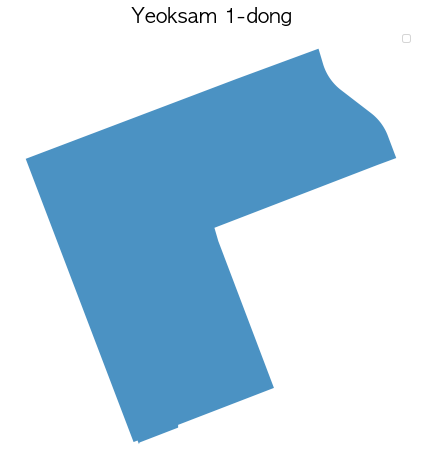

In [ ]:
#화곡 관련 행정동 경계
ax = boundary_ys.plot(column="ADM_DR_NM", figsize=(8,8), alpha=0.8)
ax.set_title("Yeoksam 1-dong", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

In [ ]:
boundary_ys.geometry

0    POLYGON ((202882.802 443362.853, 202856.732 44...
Name: geometry, dtype: geometry

In [ ]:
print(grid20.crs)
print(grid30.crs)
print(grid40.crs)
print(boundary_ys.crs)

epsg:5179
epsg:5179
epsg:5179
None


In [ ]:
boundary_ys.crs = {'init':'epsg:5181'}
print(boundary_ys.crs)

+init=epsg:5181 +type=crs


In [ ]:
boundary_ys=boundary_ys.to_crs({'init':'epsg:5179'})
print(boundary_ys.crs)

+init=epsg:5179 +type=crs


In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [ ]:
boundary_ys.geometry

0    POLYGON ((958680.429 1943487.584, 958654.316 1...
Name: geometry, dtype: geometry

In [ ]:
grid20.geometry

0       POLYGON ((957900.000 1945400.000, 957900.000 1...
1       POLYGON ((961300.000 1944800.000, 961300.000 1...
2       POLYGON ((958500.000 1945200.000, 958500.000 1...
3       POLYGON ((958300.000 1945600.000, 958300.000 1...
4       POLYGON ((959200.000 1943200.000, 959200.000 1...
                              ...                        
4165    POLYGON ((963800.000 1944300.000, 963800.000 1...
4166    POLYGON ((961000.000 1943000.000, 961000.000 1...
4167    POLYGON ((964900.000 1941900.000, 964900.000 1...
4168    POLYGON ((964600.000 1939900.000, 964600.000 1...
4169    POLYGON ((959400.000 1947600.000, 959400.000 1...
Name: geometry, Length: 4170, dtype: geometry

In [ ]:
#역삼1동에 속하는 격자만 뽑기
ys=grid20.geometry.within(boundary_ys.iloc[0].geometry)

In [ ]:
ys

0       False
1       False
2        True
3       False
4       False
        ...  
4165    False
4166    False
4167    False
4168    False
4169    False
Length: 4170, dtype: bool

In [ ]:
#화곡~동에 표함되는 좌표들만 뽑은 것
grid_ys=grid20[ys==True]
grid_ys

,gid,lbl,val,geometry
2,다사585452,N/A,0.000,"POLYGON ((958500.000 1945200.000, 958500.000 1..."
27,다사585446,59.00,59.000,"POLYGON ((958500.000 1944600.000, 958500.000 1..."
46,다사582446,6.00,6.000,"POLYGON ((958200.000 1944600.000, 958200.000 1..."
47,다사596451,41.00,41.000,"POLYGON ((959600.000 1945100.000, 959600.000 1..."
55,다사586444,29.00,29.000,"POLYGON ((958600.000 1944400.000, 958600.000 1..."
...,...,...,...,...
3829,다사590448,None,nan,"POLYGON ((959000.000 1944800.000, 959000.000 1..."
3895,다사587445,None,nan,"POLYGON ((958700.000 1944500.000, 958700.000 1..."
3917,다사581448,None,nan,"POLYGON ((958100.000 1944800.000, 958100.000 1..."
4003,다사584444,None,nan,"POLYGON ((958400.000 1944400.000, 958400.000 1..."


In [ ]:
grid_ys=grid_ys.reset_index()
grid_ys

,index,gid,lbl,val,geometry
0,2,다사585452,N/A,0.000,"POLYGON ((958500.000 1945200.000, 958500.000 1..."
1,27,다사585446,59.00,59.000,"POLYGON ((958500.000 1944600.000, 958500.000 1..."
2,46,다사582446,6.00,6.000,"POLYGON ((958200.000 1944600.000, 958200.000 1..."
3,47,다사596451,41.00,41.000,"POLYGON ((959600.000 1945100.000, 959600.000 1..."
4,55,다사586444,29.00,29.000,"POLYGON ((958600.000 1944400.000, 958600.000 1..."
...,...,...,...,...,...
184,3829,다사590448,None,nan,"POLYGON ((959000.000 1944800.000, 959000.000 1..."
185,3895,다사587445,None,nan,"POLYGON ((958700.000 1944500.000, 958700.000 1..."
186,3917,다사581448,None,nan,"POLYGON ((958100.000 1944800.000, 958100.000 1..."
187,4003,다사584444,None,nan,"POLYGON ((958400.000 1944400.000, 958400.000 1..."


In [ ]:
grid_ys=grid_ys.drop(columns=['index']).copy()
grid_ys

,gid,lbl,val,geometry
0,다사585452,N/A,0.000,"POLYGON ((958500.000 1945200.000, 958500.000 1..."
1,다사585446,59.00,59.000,"POLYGON ((958500.000 1944600.000, 958500.000 1..."
2,다사582446,6.00,6.000,"POLYGON ((958200.000 1944600.000, 958200.000 1..."
3,다사596451,41.00,41.000,"POLYGON ((959600.000 1945100.000, 959600.000 1..."
4,다사586444,29.00,29.000,"POLYGON ((958600.000 1944400.000, 958600.000 1..."
...,...,...,...,...
184,다사590448,None,nan,"POLYGON ((959000.000 1944800.000, 959000.000 1..."
185,다사587445,None,nan,"POLYGON ((958700.000 1944500.000, 958700.000 1..."
186,다사581448,None,nan,"POLYGON ((958100.000 1944800.000, 958100.000 1..."
187,다사584444,None,nan,"POLYGON ((958400.000 1944400.000, 958400.000 1..."


## POLYGON-> 위경도 변환
- grid20, grid30 둘다 geometry 동일함

In [ ]:
grid_Yeoksam_POINT=grid_ys.geometry.centroid
grid_Yeoksam_POINT

0      POINT (958550.000 1945250.000)
1      POINT (958550.000 1944650.000)
2      POINT (958250.000 1944650.000)
3      POINT (959650.000 1945150.000)
4      POINT (958650.000 1944450.000)
                    ...              
184    POINT (959050.000 1944850.000)
185    POINT (958750.000 1944550.000)
186    POINT (958150.000 1944850.000)
187    POINT (958450.000 1944450.000)
188    POINT (958650.000 1943850.000)
Length: 189, dtype: geometry

In [ ]:
#geometry 좌표-> 위경도(epsg:4326)로 변환해줌
grid_Yeoksam_longlat = grid_Yeoksam_POINT.to_crs({'init':'epsg:4326'})

In [ ]:
grid_Yeoksam_longlat

0      POINT (127.03102 37.50559)
1      POINT (127.03106 37.50018)
2      POINT (127.02766 37.50017)
3      POINT (127.04347 37.50474)
4      POINT (127.03220 37.49839)
                  ...            
184    POINT (127.03670 37.50201)
185    POINT (127.03332 37.49929)
186    POINT (127.02652 37.50197)
187    POINT (127.02994 37.49838)
188    POINT (127.03223 37.49298)
Length: 189, dtype: geometry

In [ ]:
#Pandas Dataframe
grid_Yeoksam_longlat = pd.DataFrame(grid_Yeoksam_longlat)
grid_Yeoksam_longlat

,0
0,POINT (127.03102 37.50559)
1,POINT (127.03106 37.50018)
2,POINT (127.02766 37.50017)
3,POINT (127.04347 37.50474)
4,POINT (127.03220 37.49839)
...,...
184,POINT (127.03670 37.50201)
185,POINT (127.03332 37.49929)
186,POINT (127.02652 37.50197)
187,POINT (127.02994 37.49838)


In [ ]:
grid_Yeoksam_longlat.to_csv('grid_Yeoksam_longlat_grid_432_1.csv',index=False,header=True)

In [ ]:
grid_Yeoksam_longlat=pd.read_csv('grid_Yeoksam_longlat_grid_432_1.csv')
grid_Yeoksam_longlat

,0
0,POINT (127.0310223340273 37.50559202592988)
1,POINT (127.0310561599141 37.50018401018296)
2,POINT (127.0276622204407 37.50017048840741)
3,POINT (127.0434731842037 37.50473944385289)
4,POINT (127.0321987196677 37.49838582245921)
...,...
184,POINT (127.0367015924081 37.50200900371576)
185,POINT (127.0333243970604 37.49929163379839)
186,POINT (127.026519524711 37.50196863078294)
187,POINT (127.0299361469854 37.49837684102481)


### 화곡동 격자 -> 위경도로 변환

In [ ]:
grid_Yeoksam_longlat['0'] = grid_Yeoksam_longlat['0'].str.replace('POINT ()', '')
grid_Yeoksam_longlat['0'] = grid_Yeoksam_longlat['0'].str.replace('(', '')
grid_Yeoksam_longlat['0'] = grid_Yeoksam_longlat['0'].str.replace(')', '')
grid_Yeoksam_longlat['경도'] = grid_Yeoksam_longlat['0'].str.split(' ').str[0]
grid_Yeoksam_longlat['위도'] = grid_Yeoksam_longlat['0'].str.split(' ').str[1]
grid_Yeoksam_longlat.drop(columns=['0'],inplace=True)
grid_Yeoksam_longlat # 화곡동 격자 위경도로 변환

,경도,위도
0,127.0310223340273,37.50559202592988
1,127.0310561599141,37.50018401018296
2,127.0276622204407,37.50017048840741
3,127.0434731842037,37.50473944385289
4,127.0321987196677,37.49838582245921
...,...,...
184,127.0367015924081,37.50200900371576
185,127.0333243970604,37.49929163379839
186,127.026519524711,37.50196863078294
187,127.0299361469854,37.49837684102481


In [ ]:
grid_Yeoksam_longlat['위도'] = pd.to_numeric(grid_Yeoksam_longlat['위도'])
grid_Yeoksam_longlat['경도'] = pd.to_numeric(grid_Yeoksam_longlat['경도'])
grid_Yeoksam_longlat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   경도      189 non-null    float64
 1   위도      189 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


### 강남구 203040대 인구수 합치기

In [ ]:
grid20['val'] + grid30['val'] + grid40['val'] 

0      104.000
1       97.000
2        0.000
3      319.000
4       85.000
         ...  
4165       nan
4166       nan
4167       nan
4168       nan
4169       nan
Name: val, Length: 4170, dtype: float64

In [ ]:
# 203040 인구 수 합치기
grid_ys_203040= pd.DataFrame({'gid':grid30['gid'], 
                                'val':grid20['val'] +grid30['val']+grid40['val'],
                                'geometry':grid30['geometry']})

grid_ys_203040

,gid,val,geometry
0,다사579454,104.000,"POLYGON ((957900.000 1945400.000, 957900.000 1..."
1,다사613448,97.000,"POLYGON ((961300.000 1944800.000, 961300.000 1..."
2,다사585452,0.000,"POLYGON ((958500.000 1945200.000, 958500.000 1..."
3,다사583456,319.000,"POLYGON ((958300.000 1945600.000, 958300.000 1..."
4,다사592432,85.000,"POLYGON ((959200.000 1943200.000, 959200.000 1..."
...,...,...,...
4165,다사638443,nan,"POLYGON ((963800.000 1944300.000, 963800.000 1..."
4166,다사610430,nan,"POLYGON ((961000.000 1943000.000, 961000.000 1..."
4167,다사649419,nan,"POLYGON ((964900.000 1941900.000, 964900.000 1..."
4168,다사646399,nan,"POLYGON ((964600.000 1939900.000, 964600.000 1..."


In [ ]:
#역삼1동에 표함되는 좌표들만 뽑은 것
grid_Yeoksam_203040=grid_ys_203040[ys==True]
grid_Yeoksam_203040

,gid,val,geometry
2,다사585452,0.000,"POLYGON ((958500.000 1945200.000, 958500.000 1..."
27,다사647409,174.000,"POLYGON ((964700.000 1940900.000, 964700.000 1..."
46,다사581454,108.000,"POLYGON ((958100.000 1945400.000, 958100.000 1..."
47,다사631424,316.000,"POLYGON ((963100.000 1942400.000, 963100.000 1..."
55,다사602437,46.000,"POLYGON ((960200.000 1943700.000, 960200.000 1..."
...,...,...,...
3829,다사605413,nan,"POLYGON ((960500.000 1941300.000, 960500.000 1..."
3895,다사608415,nan,"POLYGON ((960800.000 1941500.000, 960800.000 1..."
3917,다사608418,nan,"POLYGON ((960800.000 1941800.000, 960800.000 1..."
4003,다사623432,nan,"POLYGON ((962300.000 1943200.000, 962300.000 1..."


### 결측치(nan)-> 0으로 변경

In [ ]:
grid_Yeoksam_203040 = grid_Yeoksam_203040.fillna(0)
grid_Yeoksam_203040

,gid,val,geometry
2,다사585452,0.000,"POLYGON ((958500.000 1945200.000, 958500.000 1..."
27,다사647409,174.000,"POLYGON ((964700.000 1940900.000, 964700.000 1..."
46,다사581454,108.000,"POLYGON ((958100.000 1945400.000, 958100.000 1..."
47,다사631424,316.000,"POLYGON ((963100.000 1942400.000, 963100.000 1..."
55,다사602437,46.000,"POLYGON ((960200.000 1943700.000, 960200.000 1..."
...,...,...,...
3829,다사605413,0.000,"POLYGON ((960500.000 1941300.000, 960500.000 1..."
3895,다사608415,0.000,"POLYGON ((960800.000 1941500.000, 960800.000 1..."
3917,다사608418,0.000,"POLYGON ((960800.000 1941800.000, 960800.000 1..."
4003,다사623432,0.000,"POLYGON ((962300.000 1943200.000, 962300.000 1..."


### 수요량 칼럼(hi)만 빼놓기

In [ ]:
hi= grid_Yeoksam_203040['val']
hi=pd.DataFrame(hi)
hi

,val
2,0.000
27,174.000
46,108.000
47,316.000
55,46.000
...,...
3829,0.000
3895,0.000
3917,0.000
4003,0.000


## 수요량 적용+ P-median 계산




### 거리행렬 계산

In [ ]:
grid_Yeoksam_longlat

,경도,위도
0,127.031,37.506
1,127.031,37.500
2,127.028,37.500
3,127.043,37.505
4,127.032,37.498
...,...,...
184,127.037,37.502
185,127.033,37.499
186,127.027,37.502
187,127.030,37.498


In [ ]:
facilities_df_ys

,Unnamed: 0,V1,V2,지하철,버스정류장,상존인구,주거인구,직장인구,가구세대,아파트세대,버스정류장점수,지하철점수,총점,위도,경도
0,5,롯데슈퍼 역삼3점,서울특별시 강남구 역삼동 748-14,NaN,역삼초등학교,-0.262,1.135,-1.202,1.397,1.563,1.957,0.000,4.588,37.495,127.036
1,9,SK엔크린 SK서광주유소,서울특별시 강남구 역삼동 834-47,NaN,역삼초등학교,-0.119,1.388,-1.154,1.185,1.318,1.957,0.000,4.576,37.494,127.035
2,7,이마트에브리데이 역삼점,서울특별시 강남구 역삼동 833-4,NaN,역삼초등학교,0.182,0.881,-0.135,1.105,0.445,1.957,0.000,4.436,37.494,127.033
3,4,다이소 강남본점,서울특별시 강남구 역삼동 826-24,강남역,"강남역, 강남역.역삼세무서, 신분당선강남역, 강남역.삼성전자, 강남역하나은행, 강...",1.823,0.226,1.704,-0.319,0.473,1.215,-1.152,3.971,37.496,127.029
4,1,노브랜드 강남역삼점,서울특별시 강남구 역삼동 832-6,NaN,"우성아파트사거리, 수협서초지점, 서초청소년도서관, 래미안아파트.파이낸셜뉴스(중), ...",-0.085,0.174,0.760,0.100,-0.219,1.000,0.000,1.729,37.492,127.031


In [ ]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

def get_radian(df) : 
    x_rad_list = []
    y_rad_list = []

    for idx, row in df.iterrows() :
        x, y = row['경도'], row['위도']
        x_rad = radians(x)
        y_rad = radians(y)
        x_rad_list.append(x_rad)
        y_rad_list.append(y_rad)

    df['경도_rad'] = x_rad_list
    df['위도_rad'] = y_rad_list

    array =  np.array(df[['경도_rad', '위도_rad']])
    return array


#수요지 위경도 radian 변경 
demand_array = get_radian(grid_Yeoksam_longlat)

#후보지 위경도 radian 변경 
facilities_array = get_radian(facilities_df_ys)

In [ ]:
#haversine_distance 구하기
def get_distance(array1, array2) : 
    result_list = [] 
    for f in array1 : 
        for d in array2 :
            result = haversine_distances([f,d])
            result = result* 6371
            result = result[0][1]
            result_list.append(result)

    return pd.DataFrame(result_list)

In [ ]:
result_df = pd.DataFrame()
for i in range(len(facilities_array)) :
    df = get_distance(facilities_array[i:i+1],demand_array[:])
    result_df = pd.concat([result_df, df], axis=1)

In [ ]:
result_df.columns = list(range(0,len(facilities_array)))
result_df

,0,1,2,3,4
0,0.900,0.870,0.822,0.670,0.904
1,0.650,0.587,0.487,0.345,0.542
2,0.989,0.906,0.749,0.322,0.645
3,1.057,1.163,1.352,1.692,1.642
4,0.479,0.412,0.323,0.370,0.448
...,...,...,...,...,...
184,0.476,0.539,0.668,0.926,0.932
185,0.413,0.377,0.363,0.509,0.556
186,1.152,1.074,0.922,0.493,0.816
187,0.711,0.626,0.474,0.176,0.432


### 최적화

In [ ]:
!pip install pulp
from pulp import *

In [ ]:
facilities = list(result_df.columns)
demand = list(result_df.index)

In [ ]:
#최종선택되는 후보지 개수 
p = 1 

#결정변수
X = LpVariable.dicts('X', (facilities), 0, 1, LpInteger)
Y = LpVariable.dicts('Y', (demand, facilities), 0, 1, LpInteger) # 수요지마다 7개 후보지에 다 연결
print(X)
print(Y)

{0: X_0, 1: X_1, 2: X_2, 3: X_3, 4: X_4}
{0: {0: Y_0_0, 1: Y_0_1, 2: Y_0_2, 3: Y_0_3, 4: Y_0_4}, 1: {0: Y_1_0, 1: Y_1_1, 2: Y_1_2, 3: Y_1_3, 4: Y_1_4}, 2: {0: Y_2_0, 1: Y_2_1, 2: Y_2_2, 3: Y_2_3, 4: Y_2_4}, 3: {0: Y_3_0, 1: Y_3_1, 2: Y_3_2, 3: Y_3_3, 4: Y_3_4}, 4: {0: Y_4_0, 1: Y_4_1, 2: Y_4_2, 3: Y_4_3, 4: Y_4_4}, 5: {0: Y_5_0, 1: Y_5_1, 2: Y_5_2, 3: Y_5_3, 4: Y_5_4}, 6: {0: Y_6_0, 1: Y_6_1, 2: Y_6_2, 3: Y_6_3, 4: Y_6_4}, 7: {0: Y_7_0, 1: Y_7_1, 2: Y_7_2, 3: Y_7_3, 4: Y_7_4}, 8: {0: Y_8_0, 1: Y_8_1, 2: Y_8_2, 3: Y_8_3, 4: Y_8_4}, 9: {0: Y_9_0, 1: Y_9_1, 2: Y_9_2, 3: Y_9_3, 4: Y_9_4}, 10: {0: Y_10_0, 1: Y_10_1, 2: Y_10_2, 3: Y_10_3, 4: Y_10_4}, 11: {0: Y_11_0, 1: Y_11_1, 2: Y_11_2, 3: Y_11_3, 4: Y_11_4}, 12: {0: Y_12_0, 1: Y_12_1, 2: Y_12_2, 3: Y_12_3, 4: Y_12_4}, 13: {0: Y_13_0, 1: Y_13_1, 2: Y_13_2, 3: Y_13_3, 4: Y_13_4}, 14: {0: Y_14_0, 1: Y_14_1, 2: Y_14_2, 3: Y_14_3, 4: Y_14_4}, 15: {0: Y_15_0, 1: Y_15_1, 2: Y_15_2, 3: Y_15_3, 4: Y_15_4}, 16: {0: Y_16_0, 1: Y_16_1, 2: Y_16_2, 3: Y

In [ ]:
hi

,val
2,0.000
27,174.000
46,108.000
47,316.000
55,46.000
...,...
3829,0.000
3895,0.000
3917,0.000
4003,0.000


In [ ]:
hi.iloc[4]

val   46.000
Name: 55, dtype: float64

In [ ]:
#목적함수 정의
prob = LpProblem('P Median', LpMinimize)
prob += sum(sum( hi.iloc[i][0]* result_df.iloc[i,j] * Y[i][j] for j in facilities) for i in demand)  
# Min ΣiΣj hi * dij * yij
# prob += sum(sum(hi * result_df.iloc[i,j] * Y[i][j] for j in facilities) for i in demand)
# hi: 수요량 (인덱스로 표시, i=0,1,....3773)

###############################################################################################################################################################
#제한식 
prob += lpSum([X[j] for j in facilities]) == p

for i in demand: prob += sum(Y[i][j] for j in facilities) == 1   # Σjyij=1 : 수요지 i의 수요량이 가장 가까운 거리에 있는 j에 설치된 돌봄시설에 할당되면 1

for i in demand:
    for j in facilities: 
        prob +=  Y[i][j] <= X[j]

In [ ]:
prob.solve()

1

In [ ]:
for v in prob.variables():
    subV = v.name.split('_')
    
    if subV[0] == "X" and v.varValue == 1: print('p-Median Node: ', subV[1])

p-Median Node:  0


In [ ]:
result = [] 
for v in prob.variables():
    subV = v.name.split('_')
    if subV[0] == "Y" and v.varValue == 1: 
    	result.append((subV[1], ' is connected to', subV[2]))
print(result)

[('0', ' is connected to', '0'), ('100', ' is connected to', '0'), ('101', ' is connected to', '0'), ('102', ' is connected to', '0'), ('103', ' is connected to', '0'), ('104', ' is connected to', '0'), ('105', ' is connected to', '0'), ('106', ' is connected to', '0'), ('107', ' is connected to', '0'), ('108', ' is connected to', '0'), ('109', ' is connected to', '0'), ('10', ' is connected to', '0'), ('110', ' is connected to', '0'), ('111', ' is connected to', '0'), ('112', ' is connected to', '0'), ('113', ' is connected to', '0'), ('114', ' is connected to', '0'), ('115', ' is connected to', '0'), ('116', ' is connected to', '0'), ('117', ' is connected to', '0'), ('118', ' is connected to', '0'), ('119', ' is connected to', '0'), ('11', ' is connected to', '0'), ('120', ' is connected to', '0'), ('121', ' is connected to', '0'), ('122', ' is connected to', '0'), ('123', ' is connected to', '0'), ('124', ' is connected to', '0'), ('125', ' is connected to', '0'), ('126', ' is conn

### 시각화

In [ ]:
import folium 

In [ ]:
hi=hi.reset_index()
hi

,index,val
0,2,0.000
1,27,174.000
2,46,108.000
3,47,316.000
4,55,46.000
...,...,...
184,3829,0.000
185,3895,0.000
186,3917,0.000
187,4003,0.000


In [ ]:
faciliteis_latlon = np.array(facilities_df_ys[['위도', '경도']])
demand_latlon = np.array(grid_Yeoksam_longlat[['위도', '경도']])

m = folium.Map([37.495,127.036], zoom_start=15)

#folium.Marker(location=faciliteis_latlon[i].tolist()).add_to(m)

for i in range(len(faciliteis_latlon)) : 
    folium.Marker(
        location = faciliteis_latlon[i].tolist(),
        popup = str(facilities_df_ys.index[i]) + '_' + facilities_df_ys['V2'].values[i],
        icon = folium.Icon(color='red', icon='star')).add_to(m)
    
for i in range(len(demand_latlon)) : 
    folium.CircleMarker(
        location = demand_latlon[i].tolist(),
        radius=hi.loc[i,'val']/40+0.000001,
        popup = str(hi.index[i]),
        color='#3186cc', fill_color='#3186cc').add_to(m)

In [ ]:
m